# Taller 2
## Juan Felipe Herrera Rodriguez
## Carlos Fernando Gonzalez Sarmiento
### Grupo 3

# Taller modelos lineales


# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [321]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [322]:
income.shape

(32561, 15)

## Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



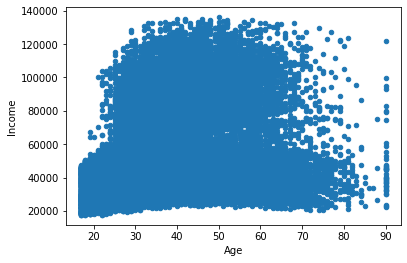

In [323]:
income.plot(x='Age', y='Income', kind='scatter')

De acuerdo a la anterior gráfica, desde la edad de 15 años hasta los 50 años aproximandamente, los ingresos tienden a aumentar y despúes de esta edad, los ingresos tienden a empezar a bajar en algunos casos. Además, se observa que despúes de los 80 años algunos individuos no tienen ingresos.    

Sin embargo, es importante aclarar que la relación no termina siendo muy clara en la gráfica, ya que al principio pareciera tener una relación positiva pero despúes se ve una relación inversa.

In [324]:
x = income.Age
y = income.Income

## Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [365]:
from sklearn import linear_model
mod = linear_model.LinearRegression()

In [326]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [327]:
mod.fit(x,y)

LinearRegression()

In [328]:
mod.coef_

array([[542.16765707]])

**Interpretación** 

B1: Un aumento de 1 unidad en la "edad", se asocia con un aumento de 542.167 unidades en los "ingresos".

**Edad de 30 años**



In [329]:
mod.intercept_ + mod.coef_ * 30

array([[48803.11784304]])

Para una persona de 30 años de edad, se estiman ingresos iguales a 48803.117

**Edad de 40 años**


In [330]:
mod.intercept_ + mod.coef_ * 40

array([[54224.79441376]])

Para una persona de 40 años de edad, se estiman ingresos iguales a 54224.794

**Predicciones generales**

In [331]:
y_pred = mod.predict(x)

Text(0, 0.5, 'Ingresos')

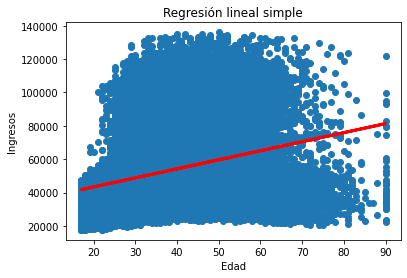

In [332]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red",linewidth=3)
plt.title("Regresión lineal simple")
plt.xlabel("Edad")
plt.ylabel("Ingresos")

**MSE**

In [333]:
def mse (y1, y_predict):
    y1, y_predict = np.array (y1), np.array (y_predict)
    return np.square (np.subtract (y1, y_predict)). mean () 

In [334]:
mse(y,y_pred)

593783043.8402299


## Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [335]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [336]:
X = income[['Age', 'Age2']].values
X[0:5]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       [  53, 2809],
       [  28,  784]])

In [337]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [338]:
n_samples = x.shape[0]

In [339]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

In [340]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([[ 53455.8091582 ],
       [ 42718.04340395],
       [-36011.57934338]])

**Edad 30 años**


In [341]:
x = np.array([30., 30.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1,x_scaled]
x_

array([[ 1.        , -0.6291427 , -0.65698034]])

In [342]:
def lr(beta,x):
    return np.dot(beta, x.T)

In [343]:
betas_ols = np.squeeze(np.asarray(betas_ols))
x_ = np.squeeze(np.asarray(x_))

In [344]:
y_pred0 = lr(betas_ols,  x_)
y_pred0

50238.9639002733

Para una persona de 30 años de edad, se estiman ingresos iguales a 50238.96

**MSE para la estimación de ingresos para una persona 30 años**

In [345]:
mse(y,y_pred0)

658821418.8378226

**Edad de 40 años**

In [346]:
x2 = np.array([40., 40.**2])

# scale
x2_scaled = ss.transform(x2.reshape(1, -1))
x2_ = np.c_[1, x2_scaled]
x2_

array([[ 1.        ,  0.10398314, -0.06327166]])

In [347]:
x2_ = np.squeeze(np.asarray(x2_))

In [348]:
y_pred1 = lr(betas_ols, x2_)
y_pred1

60176.27802691511

Para una persona de 40 años de edad, se estiman ingresos iguales a 60176.27

**MSE para la estimación de ingresos para una persona 40 años**

In [349]:
mse(y,y_pred1)

693638027.2398378

**Comparación**:

Teniendo en cuenta la estimación del modelo de regresión lineal simple mediante sklearn y las ecuaciones OLS, se evidencio que los ingresos de personas tanto de 30 y 40 años, aumentaron ejecutando las ecuaciones OLS. Por otro lado, el MSE más pequeño se obtuvo estimación del modelo de regresión lienal simple con un valor de 593783043.840.




## Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


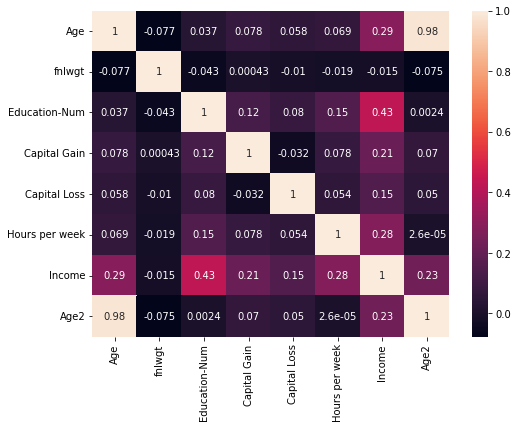

In [350]:
import seaborn as sns
corr_df = income.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Teniendo en cuenta la matriz de correlación del conjunto de datos, las variables para explicar los ingresos en un modelo de regresión multiple, fueron escogidas de acuerdo a las que tuvieran los niveles más altos de correlación con los ingresos, y que las variables escogidas tuvieran bajas correlaciones entre ellas mismas para no tener problemas de multicolinealidad. Es por esto que se optó por estimar los ingresos con las variables independientes Age, Capital Gain y hours-per-week, correlacionadas con los ingresos con un valor de 29%, 21% y 28% respectivamente.  

La variable Education-Num no se tomo en cuenta dado que se asumio que es de tipo categorico y esto podria afectar el modelo para la estimación.

In [351]:
x_multiple = income.iloc[:,[0,10,12]]
x_multiple

,Age,Capital Gain,Hours per week
0,39,2174,40
1,50,0,13
2,38,0,40
3,53,0,40
4,28,0,40
...,...,...,...
32556,27,0,38
32557,40,0,40
32558,58,0,40
32559,22,0,20


In [352]:
x_multiple = x_multiple.values.reshape(-1,3)

In [353]:
model = linear_model.LinearRegression()

In [354]:
model.fit(x_multiple, y)

LinearRegression()

In [355]:
model.coef_

array([[484.43615768,   0.60234643, 520.57725466]])

**Interpretación:** 

B1: Un aumento de 1 unidad en la "edad", se asocia con un aumento de 484.436 unidades en los "ingresos".

B2: Un aumento de 1 unidad en el "ganancia capital", se asocia con un aumento de  0.6023 unidades en los "ingresos".

B3: Un aumento de 1 unidad en las "horas por semana", se asocia con un aumento de 520.577 unidades en los "ingresos".

**Edad de 30 años**

In [356]:
model.intercept_ +  model.coef_ * 30

array([[27598.61149515, 13083.59715762, 28682.84440469]])

*Se tomo en cuenta solo el B1 ya que se esta estimando los ingresos en función de la edad.* 

Para una persona de 30 años de edad, se estiman ingresos iguales a 27598.611

**Edad de 40 años**

In [357]:
model.intercept_ + model.coef_ * 40

array([[32442.97307192, 13089.62062188, 33888.6169513 ]])

*Se tomo en cuenta solo el B1 ya que se esta estimando los ingresos en función de la edad.* 

Para una persona de 40 años de edad, se estiman ingresos iguales a 32442.973

**MSE**

In [361]:
y_pred2=model.predict(x_multiple)

In [362]:
mse(y,y_pred2)

528815446.2499931

**Comparación:**

Teniendo en cuenta la estimación del modelo de regresión lineal multiple mediante sklearn y las ecuaciones OLS, se evidencio que los ingresos de personas tanto de 30 y 40 años, disminuyeron ejecutando el modelo de regresión multiple. Por otro lado, el MSE más pequeño se obtuvo para la estimación del modelo de regresión multiple con un valor de 528815446.249.



## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.

In [381]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_multiple,y,test_size=0.1,random_state=1)

In [382]:
#Estimar los modelos con el conjunto de entrenamiento
clf1_tt = linear_model.LinearRegression()
clf1_tt.fit(x_train, y_train)

LinearRegression()

**k=2 test**


In [383]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=2, random_state=666, shuffle=True)

In [384]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf1_tt, x_train, y_train, scoring='neg_mean_squared_error', cv=cv1, n_jobs=-1)
print('MSE:', abs(np.mean(scores1)))

MSE: 530905970.6745753


**K=5 test**

In [385]:
cv2 = KFold(n_splits=5, random_state=666, shuffle=True)

In [386]:
scores2 = cross_val_score(clf1_tt, x_train, y_train, scoring='neg_mean_squared_error', cv=cv2, n_jobs=-1)
print('MSE:', abs(np.mean(scores2)))

MSE: 530791155.7122213


**K=10 test**

In [387]:
cv3 = KFold(n_splits=10, random_state=666, shuffle=True)

In [388]:
scores3 = cross_val_score(clf1_tt, x_train, y_train, scoring='neg_mean_squared_error', cv=cv3, n_jobs=-1)
print('MSE:', abs(np.mean(scores3)))

MSE: 530691378.6534902


**Validación**

In [389]:
y_pred3 = clf1_tt.predict(x_test)

In [390]:
from sklearn import metrics
print("MSE para validación:", metrics.mean_squared_error(y_test,y_pred3))

MSE para validación: 513651363.66103035


**Comparación:**

Teniendo en cuenta la estimación del modelo de regresión lineal mediante K fold cross, se evidencio que el MSE más pequeño se obtuvo para la estimación del modelo de regresión de validación, dado que arrojo un valor de 513651363.66103035.


#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [391]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [392]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



La distribución de los churners es loogistica ya que existen solo valores de verdadero y falso, es decir 1 y 0.

#### Transformación

In [393]:
data['Churn1']= data['Churn?'].map({'False.':0,'True.':1})

In [394]:
(data['Churn?']=='False.').sum()

2850

In [395]:
(data['Churn?']=='True.').sum()

483

In [396]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn1
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False.,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False.,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False.,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False.,0


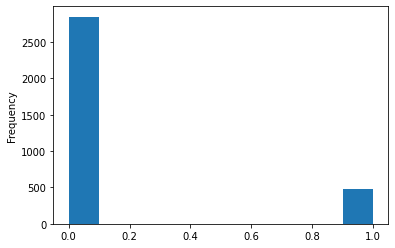

In [397]:
data['Churn1'].plot.hist()

Text(0, 0.5, 'Churners')

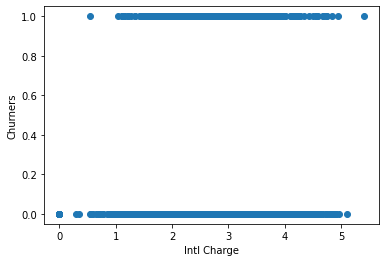

In [398]:
plt.scatter(data['Intl Charge'],data['Churn1'])
plt.xlabel('Intl Charge')
plt.ylabel('Churners')

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [399]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Intl Charge']
y=data['Churn1']
X=data[feature_cols]
logreg.fit(X, y)
data['Churn_pred'] = logreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn1,Churn_pred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,0


# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [400]:
logreg.intercept_

array([-2.51428271])

In [401]:
logreg.coef_[0]

array([0.2624392])

In [402]:
1*logreg.coef_[0]

array([0.2624392])

Un aumento de 1 unidad en "IntlCharge" se asocia con un aumento de 0.2624 unidades en las probabilidades logarítmicas de "Churn".

# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


### Selección

Ya que no se especifica de que manera deben elegirse estas variables o que metodo utilizar se hará una matriz de correlación, las variables que mas correlacionadas estén con la variable Churn y menos correlacionadas entre ellas mismas serán las elgidas.

In [403]:
data.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn1,Churn_pred
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,NaN
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,NaN
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,NaN
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,NaN
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,NaN
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,NaN
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,NaN
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,NaN
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,NaN
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,NaN


Según lo ya mencionado, las variables cuantitativas que menos correlación poseen entre sí y mas correlación tienen con la variable de churn, son:

*   Day Mins
*   CustServ Calls	
*   Eve Mins





### Ajuste modelo

In [404]:
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Day Mins','CustServ Calls','Eve Mins']
y=data['Churn1']
X=data[feature_cols]
logreg.fit(X, y)
data['Churn_pred1'] = logreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn1,Churn_pred,Churn_pred1
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False.,0,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False.,0,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False.,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False.,0,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False.,0,0,0


In [405]:
(data['Churn_pred1']==0).sum()

3278

In [406]:
(data['Churn_pred1']==1).sum()

55

Predice 1 en 55 casos 

### Interpretación



In [407]:
logreg.intercept_

array([-6.12800863])

In [408]:
logreg.coef_[0]

array([0.01217654, 0.43812905, 0.00598887])

Un aumento de 1 unidad en "Day Mins" se asocia con un aumento de 0.01217654 unidades en las probabilidades logarítmicas de "Churn", manteniendo las demás variables constantes.

Un aumento de 1 unidad en "CustServ Calls" se asocia con un aumento de 0.43812905 unidades en las probabilidades logarítmicas de "Churn".

Un aumento de 1 unidad en "Eve Mins" se asocia con un aumento de 0.00598887 unidades en las probabilidades logarítmicas de "Churn".





## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.

### Partición

In [409]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2999, 3) (334, 3) (2999,) (334,)


In [410]:

clf1_tt = LogisticRegression(solver='liblinear',C=1e9)
clf1_tt.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, solver='liblinear')

### K=2

In [411]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=666, shuffle=True)

In [412]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

In [413]:
print('Precisión para k=2:', abs(np.mean(scores)))

Precisión para k=2: 0.4888888888888889


### K=5

In [414]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True)

In [415]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

In [416]:
scores

array([0.5       , 0.23529412, 0.57142857, 0.33333333, 0.625     ])

La precision de los 5 modelos

In [418]:
print('Precisión para k=5:', abs(np.mean(scores)))

Precisión para k=5: 0.4530112044817927


### K=10

In [419]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)

In [420]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1_tt, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

In [421]:
scores

array([0.4       , 0.66666667, 0.33333333, 0.25      , 0.6       ,
       0.5       , 0.6       , 0.        , 1.        , 0.57142857])

In [422]:
print('Precisión para k=10:', abs(np.mean(scores)))

Precisión para k=10: 0.4921428571428571


### Precision validacion

In [423]:
y_pred11=logreg.predict(X_test)

In [424]:
from sklearn import metrics
print('Precisión para validación:', metrics.precision_score(y_test,y_pred11))

Precisión para validación: 0.5714285714285714


### Comparación
A continuacion se procederá a comparar la precision de cada metodo:

*   K2= 0.4888888888888889
*   K5= 0.4530112044817927
*   K10= 0.4921428571428571
*   Validación= 0.5714285714285714

Finalmente se obtuvo que la precisión mas alta fue la de validación y la mas baja la de k fold 5

Gracias!